In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import shuffle
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,learning_curve,GridSearchCV


In [48]:
data = pd.read_csv("final_analysis.csv")
data = data.drop("Unnamed: 0",axis = 1)
data.head()

,curb-weight,engine-size,horsepower,city_highway_mpg,wheel-base,size,engine-location_rear,drive-wheels_fwd,drive-wheels_rwd,price
0,2548,130,111,24.0,88.6,10820.08,0,0,1,13495
1,2548,130,111,24.0,88.6,10820.08,0,0,1,16500
2,2823,152,154,22.5,94.5,11213.60,0,0,1,16500
3,2337,109,102,27.0,99.8,11690.92,0,1,0,13950
4,2824,136,115,20.0,99.4,11726.24,0,0,0,17450


In [49]:
data.corr()

,curb-weight,engine-size,horsepower,city_highway_mpg,wheel-base,size,engine-location_rear,drive-wheels_fwd,drive-wheels_rwd,price
curb-weight,1.000000,0.849072,0.757981,-0.778341,0.782097,0.905256,0.051287,-0.658408,0.670611,0.834415
engine-size,0.849072,1.000000,0.822668,-0.670185,0.572027,0.725370,0.199367,-0.511364,0.559063,0.872335
horsepower,0.757981,0.822668,1.000000,-0.818863,0.371178,0.608260,0.342126,-0.539098,0.584487,0.809607
city_highway_mpg,-0.778341,-0.670185,-0.818863,1.000000,-0.511617,-0.697210,-0.130158,0.578597,-0.563989,-0.700811
wheel-base,0.782097,0.572027,0.371178,-0.511617,1.000000,0.889137,-0.189115,-0.460120,0.499829,0.584642
size,0.905256,0.725370,0.608260,-0.697210,0.889137,1.000000,-0.055804,-0.505525,0.545476,0.737928
engine-location_rear,0.051287,0.199367,0.342126,-0.130158,-0.189115,-0.055804,1.000000,-0.146768,0.159545,0.331062
drive-wheels_fwd,-0.658408,-0.511364,-0.539098,0.578597,-0.460120,-0.505525,-0.146768,1.000000,-0.919914,-0.595979
drive-wheels_rwd,0.670611,0.559063,0.584487,-0.563989,0.499829,0.545476,0.159545,-0.919914,1.000000,0.637522
price,0.834415,0.872335,0.809607,-0.700811,0.584642,0.737928,0.331062,-0.595979,0.637522,1.000000


In [50]:
def plotting_curve(model,X_plot,y_plot):
    
    
    train_sizes = np.arange(10,round(X_plot.shape[0]*0.80),5)

    train_sizes, train_scores, validation_scores = learning_curve(
    estimator = model,
    X = X_plot,
    y = y_plot, train_sizes = train_sizes, cv = 5,
    scoring = 'neg_mean_squared_error')

    train_scores_mean = np.sqrt(-train_scores).mean(axis = 1)
    validation_scores_mean = np.sqrt(-validation_scores).mean(axis = 1)

    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title('Learning curves for a '+str(model)+' model', fontsize = 18, y = 1.03)
    plt.legend()
    plt.show()

In [51]:
random_state = 42

def split_data():
    

    X = data.drop(['price'], axis=1)
    y = data['price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
    
    return X_train, X_test, y_train, y_test


                   *****************************

[2302.28391824 3139.37324073 2725.86370632 3297.36441097 3496.01817977]
LinearRegression()  Mean Rmse :  2992.1806912037014

                   *****************************



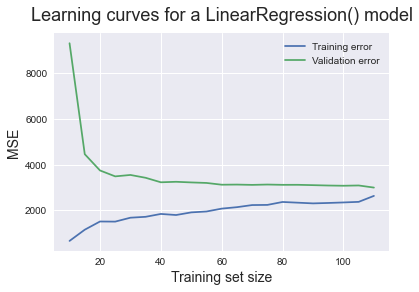


                   *****************************

[2304.0586661  3140.36846267 2724.44724819 3297.43593859 3495.05487847]
Lasso()  Mean Rmse :  2992.273038804902

                   *****************************



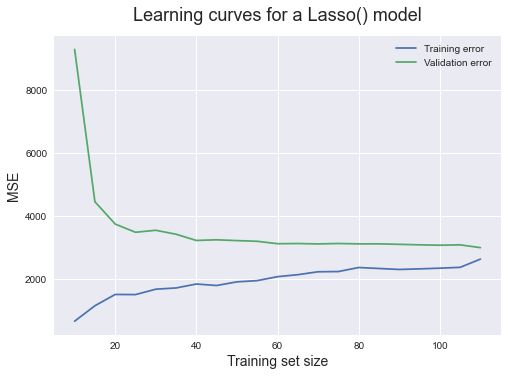


                   *****************************

[2403.71914838 3146.4958532  2703.91336056 3319.43842575 3419.44860738]
Ridge()  Mean Rmse :  2998.603079054382

                   *****************************



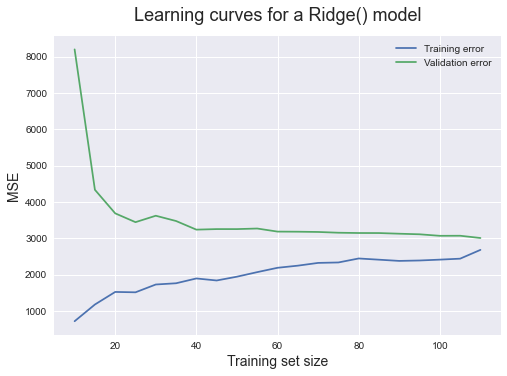

In [52]:
rmse_test =[]
r2_test =[]
model_names =[]

X_train, X_test, y_train, y_test = split_data()

lr = LinearRegression()
ls = Lasso()
rd = Ridge()


models = [lr,ls,rd]

for model in models:
    print("\n                   *****************************\n")
    scores = cross_val_score(model, X_train, y_train,scoring="neg_mean_squared_error", cv=5)
    scores = np.sqrt(-scores)
    print(scores)
    print(model," Mean Rmse : ", scores.mean())
    print("\n                   *****************************\n")
    plotting_curve(model,X_train,y_train)

### Conclusion 
#### here we can notice that the linear regression and the Lasso performs slightly better than Ridge regression . and our models are suffering from high bias let's add polynomial features to see if we can fix it

## let's try to add polynomial degree to see if we can improve the result


                   *****************************

[4995.464369   4210.11978469 3274.32802596 2766.29415828 3081.88571009]
LinearRegression()  Mean Rmse :  3665.6184096031225

                   *****************************



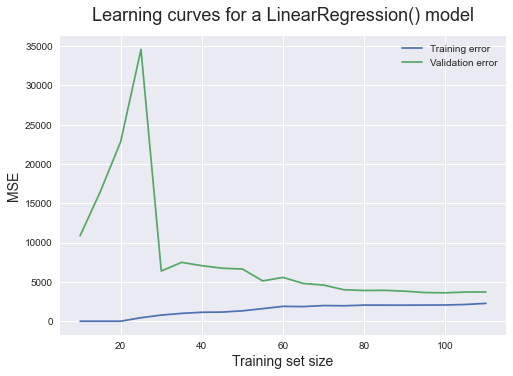


                   *****************************

[3494.03895056 4384.96704318 3264.52420053 2724.91473887 3056.57570085]
Lasso()  Mean Rmse :  3385.004126797275

                   *****************************



C:\Users\LENOVO THINKPAD X260\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 249470352.9616562, tolerance: 564539.9709491071
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO THINKPAD X260\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158389159.81184977, tolerance: 480947.49289910716
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO THINKPAD X260\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 265204262.1120257, tolerance: 580881.3709964287
  model = cd_fast.enet_coordinate_descent(
C:\Users

C:\Users\LENOVO THINKPAD X260\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 132395789.83601606, tolerance: 295880.16935368424
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO THINKPAD X260\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 147542840.958184, tolerance: 304292.2943
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO THINKPAD X260\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 162710967.9837563, tolerance: 325394.401784762
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO 

C:\Users\LENOVO THINKPAD X260\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156933075.4941787, tolerance: 374236.5203946667
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO THINKPAD X260\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170580306.96738166, tolerance: 380048.49203875003
  model = cd_fast.enet_coordinate_descent(
C:\Users\LENOVO THINKPAD X260\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180099885.89015323, tolerance: 398260.67184
  model = cd_fast.enet_coordinate_descent(
C:\Users\LEN

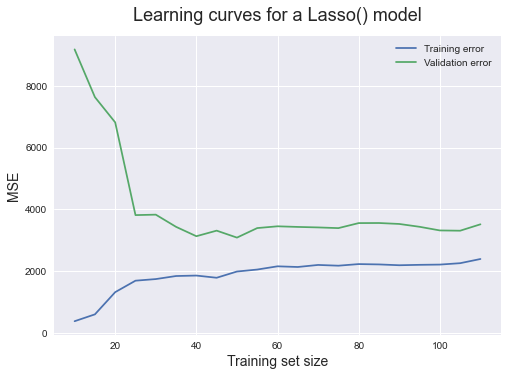


                   *****************************

[3622.419297   3870.87891833 2400.94010437 2713.71164544 3246.50057173]
Ridge()  Mean Rmse :  3170.890107371789

                   *****************************



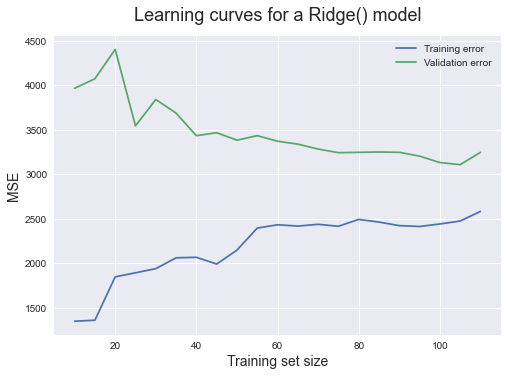

In [53]:
rmse_test =[]
r2_test =[]
model_names =[]

# removing the dummy data because there is no point of applying Polynomial features on it 
X = data.drop(['wheel-base','engine-location_rear','drive-wheels_fwd','drive-wheels_rwd','price'], axis=1)
data_pipeline = Pipeline([('ploynomial',PolynomialFeatures()),('scaler',StandardScaler())])
X = data_pipeline.fit_transform(X)
y = data['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)



# here we are adding the alpha parameter to control the overfitting 
lr = LinearRegression()
ls = Lasso()
rd = Ridge()


models = [lr,ls,rd]



for model in models:
    
    print("\n                   *****************************\n")
    scores = cross_val_score(model, X_train, y_train,scoring="neg_mean_squared_error", cv=5)
    scores = np.sqrt(-scores)
    print(scores)
    print(model," Mean Rmse : ", scores.mean())
    print("\n                   *****************************\n")
    
    plotting_curve(model,X_train,y_train)
    

    
    



### adding polynomial features doesn't add a big impact. the results now is worse than before despite the models steel suffering from high bias , the RMSE is bigger than previous

In [54]:
## Now we are going to try the ensemble algorithms

In [55]:


X = data.drop(['engine-location_rear','drive-wheels_fwd','drive-wheels_rwd','price'], axis=1)
data_pipeline = Pipeline([('scaler',StandardScaler())])
X = data_pipeline.fit_transform(X)
y = data['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt = DecisionTreeRegressor(random_state=random_state)
rf = RandomForestRegressor(random_state=random_state)
gb = GradientBoostingRegressor(random_state=random_state)
xgb = XGBRegressor(random_state=random_state)
ada = AdaBoostRegressor()


models = [dt,rf,gb,xgb,ada]

for model in models:
    scores = cross_val_score(model, X_train, y_train,scoring="neg_mean_squared_error", cv=5)
    scores = np.sqrt(-scores)
    print(scores)
    print(model," Mean Rmse : ", scores.mean())
    print("\n                   *****************************\n")
    
    

[2582.87222459 3857.55933201 2312.06263818 2541.05593209 3728.53771126]
DecisionTreeRegressor(random_state=42)  Mean Rmse :  3004.4175676261766

                   *****************************

[1735.50963891 3444.71189018 2312.28363017 2372.20242553 2961.29086891]
RandomForestRegressor(random_state=42)  Mean Rmse :  2565.199690740936

                   *****************************

[1858.46197937 2846.28407847 2431.68329576 2582.54005655 3009.58571363]
GradientBoostingRegressor(random_state=42)  Mean Rmse :  2545.711024755924

                   *****************************

[2091.49710218 3491.43147488 2154.37276332 2797.04220967 2758.4015457 ]
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interacti

### Conclusion
#### the gradient boosting algorithm has the least root squared error between them so let's try to find the best hyperparameter that can improve our resault

#### getting the number of estimator with the best performance

In [57]:

X_train, X_test, y_train, y_test = split_data()

gbrt = GradientBoostingRegressor(n_estimators=200,random_state=random_state)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_test, y_pred)
          for y_pred in gbrt.staged_predict(X_test)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(n_estimators=bst_n_estimators, random_state=random_state)
gbrt_best.fit(X_train, y_train)
y_pred = gbrt_best.predict(X_test)
print (f'model : {gbrt_best} and  rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),2)}, r2 score is {round(r2_score(y_test, y_pred),4)}')


model : GradientBoostingRegressor(n_estimators=157, random_state=42) and  rmse score is : 2235.06, r2 score is 0.9473


In [58]:


def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)



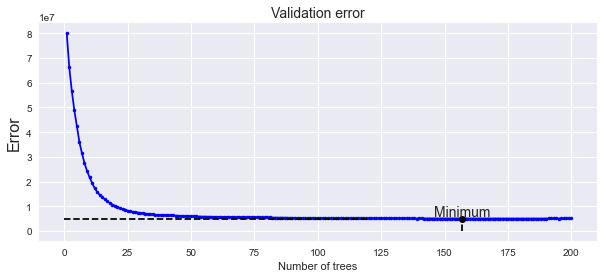

In [59]:


min_error = np.min(errors)


plt.figure(figsize=(10, 4))

plt.plot(np.arange(1, len(errors) + 1), errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)

plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)


plt.show()

In [60]:
param_distributions = {
    "n_estimators": [ bst_n_estimators],
    "learning_rate": [0.05, 0.1, 0.5, 1],
    "max_depth": [3, 4, 5, 7],
    
}


gradientboost_tree = GridSearchCV(GradientBoostingRegressor(random_state = random_state),\
                                  param_distributions,scoring = "neg_mean_squared_error",cv=5)
gradientboost_tree.fit(X_train,y_train)
    
df_gradient = pd.DataFrame(gradientboost_tree.cv_results_)[["param_n_estimators","param_learning_rate","param_max_depth",\
                                                            "mean_test_score"]]
df_gradient["mean_test_score"] = np.sqrt(df_gradient["mean_test_score"]*-1)
df_gradient.rename(columns={"mean_test_score":"Rmse"},inplace=True)

In [61]:
df_gradient.sort_values('Rmse')

,param_n_estimators,param_learning_rate,param_max_depth,Rmse
5,157,0.1,4,2396.379480
1,157,0.05,4,2443.850430
6,157,0.1,5,2525.719402
2,157,0.05,5,2563.314824
4,157,0.1,3,2568.699385
0,157,0.05,3,2590.693591
7,157,0.1,7,2605.066722
9,157,0.5,4,2626.283424
3,157,0.05,7,2657.954872
8,157,0.5,3,2731.015892


#### the best parameter for the gradient boosting algorithm is 

<ul>
    <li>
        number of estimators = 157
    </li>
    <li>
        learning rate = 0.1
    </li>
    <li>
        Max depth = 4
    </li>
</ul>

#### let's create a new model with those parameters and evaluate it

In [64]:
X= data.drop(['price'], axis=1)
y= data['price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = None)
 

gb = GradientBoostingRegressor(n_estimators=157, max_depth = 4, learning_rate=0.1,
                               random_state= 42,loss='ls')

models = [gb]

gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print (f'model : {gb} and  rmse score is : {round(np.sqrt(mean_squared_error(y_test, y_pred)),2)}, r2 score is {round(r2_score(y_test, y_pred),4)}')

#plotting_curve(gb,X_train,y_train)



model : GradientBoostingRegressor(max_depth=4, n_estimators=157, random_state=42) and  rmse score is : 2276.08, r2 score is 0.9213


#### as we can see above we get 2800 as Root mean squared error and 91.69% as R squared. which is expected comparing to the result of the cross validation error we expect to get a little higher Rmse on the test set.

#### we fit our model with default parameter and we get a lower Rmse and a higher R squared. which is good, but that's on this train and test's set. we have try different data distribution by setting the random_state as None. and the final model perform better ( the model with the tuned parameter).

#### this is the best result we have found:  Rmse score is 1775.7, r2 score is 0.9484

## 

In [65]:
import pickle

with open("my_model.pkl","wb") as file:
    
    pickle.dump(gb, file)

#model = joblib.load("model_gb.pkl")